In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1063c4530>)

In [3]:
import pandas as pd
df = pd.read_csv('medical.csv')

In [4]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [13]:
px.histogram(df, x='smoker', color='sex', title='Smoker')

In [14]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker',
                 hover_data=['sex'], 
                 opacity=0.8, 
                  
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [15]:
fig = px.scatter(df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [16]:
px.scatter(df,x="children",y='charges')

In [17]:
px.violin(df,x="children",y='charges')

correlation coefficient


In [18]:
df.charges.corr(df.age)

0.2990081933306478

In [19]:
df.charges.corr(df.bmi)

0.19834096883362887

To compute the correlation for categorical columns, they must first be converted into numeric columns.


In [20]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

0.7872514304984778

In [21]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


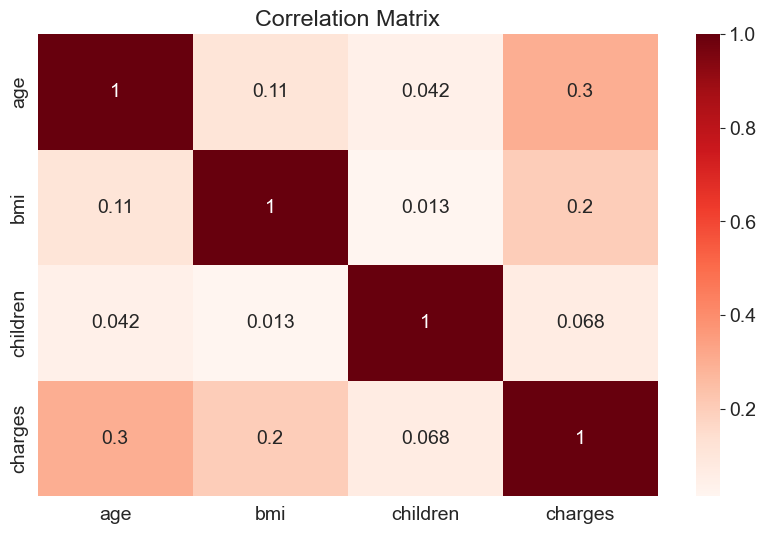

In [22]:
sns.heatmap(df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [23]:
non_smoker_df = df[df.smoker == 'no']   
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


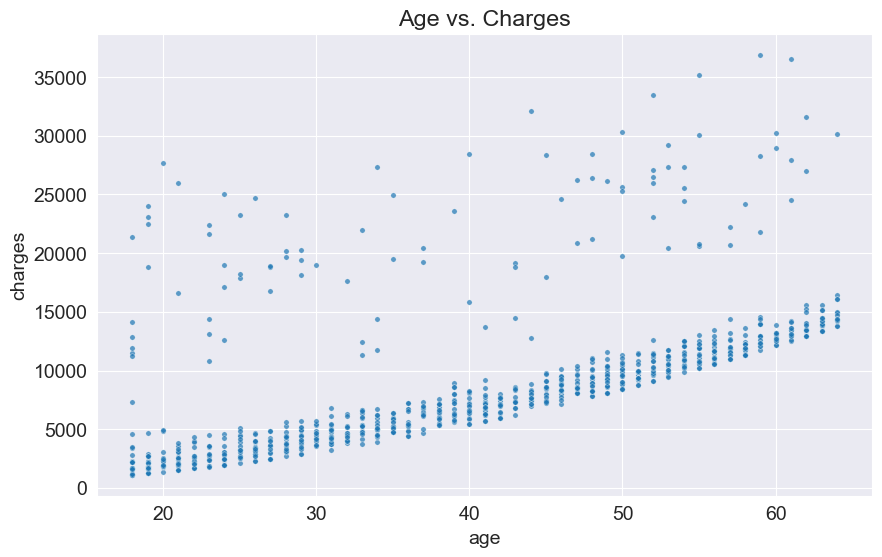

In [24]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

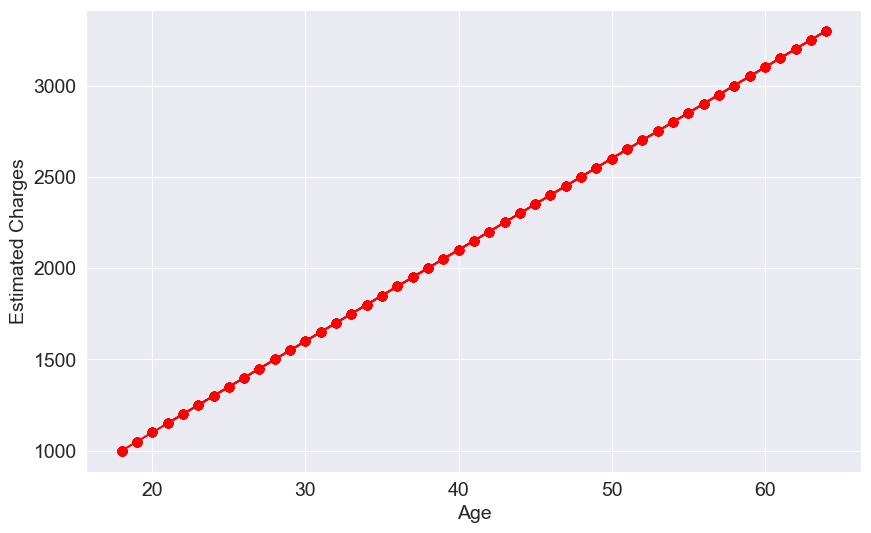

In [25]:
def estimate_charges(age, w, b):
    return w * age + b
w = 50
b = 100
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

As expected, the points lie on a straight line.
We can overlay this line on the actual data, so see how well our model fits the data.

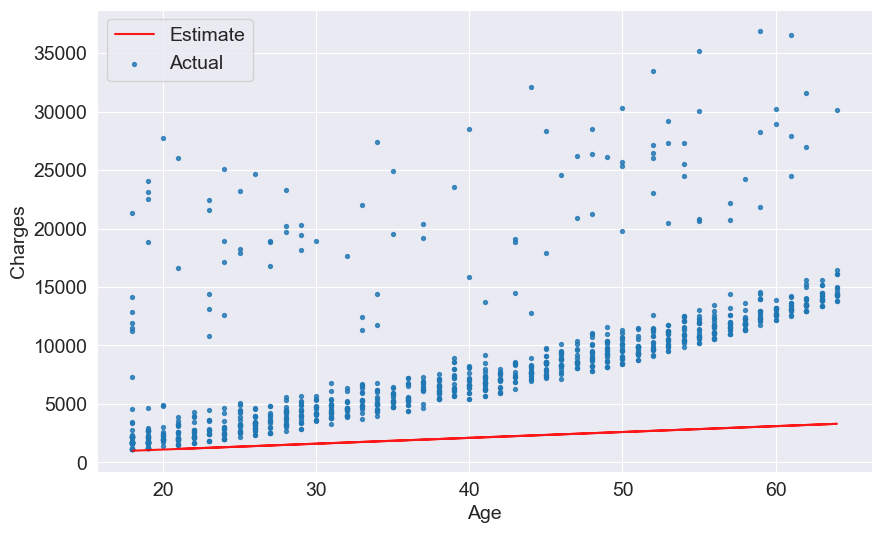

In [26]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [27]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

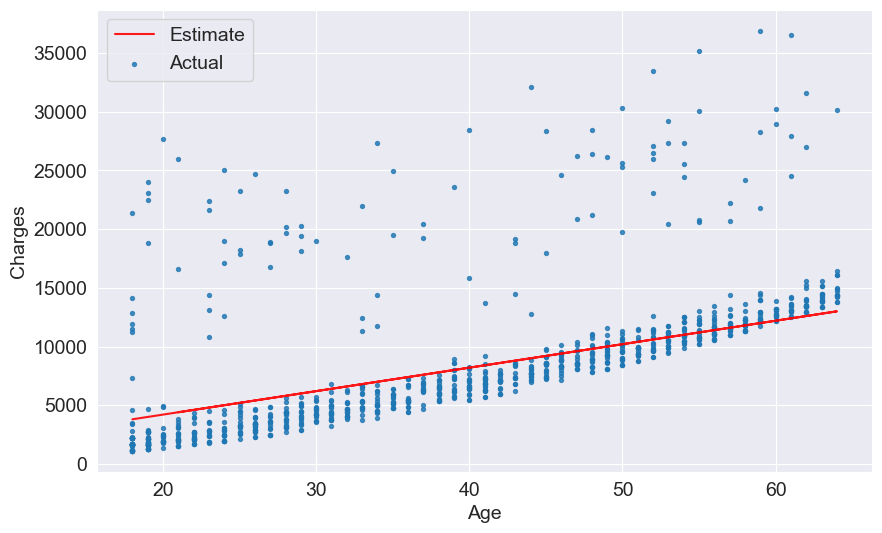

In [28]:
try_parameters(200, 200)

In [29]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
w = 50
b = 100
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(targets, predicted)

8461.949562575493

from sklearn.linear_model import LinearRegression it uses OLS(ordinary least squares)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [33]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [34]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [35]:
model.fit(inputs, targets)

LinearRegression()

In [36]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [37]:
predictions = model.predict(inputs)

In [39]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [40]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [41]:
rmse(targets, predictions)

4662.505766636395

The parameters of the model are stored in the coef_ and intercept_ properties.

In [42]:
# w
model.coef_

array([267.24891283])

In [43]:
# b
model.intercept_

-2091.420556565021

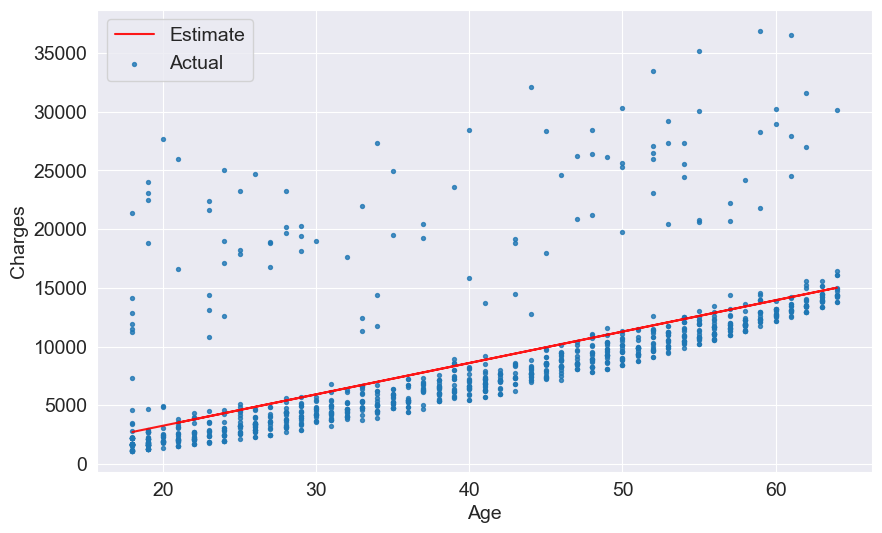

In [45]:
try_parameters(model.coef_, model.intercept_)

In [46]:
from sklearn.linear_model import SGDRegressor 

In [78]:
sgd_regressor = SGDRegressor( 
	max_iter=1000, alpha=0.001, learning_rate='invscaling', random_state=42) 


In [79]:
sgd_regressor.fit(inputs, targets) 


SGDRegressor(alpha=0.001, random_state=42)

In [80]:
sgd_regressor.predict(np.array([[23], 
                        [37], 
                        [61]]))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 1718.60943854,  5995.73448349, 13327.94884627])

In [81]:
predictions = sgd_regressor.predict(inputs)

In [82]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [83]:
predictions

array([ 191.06477963, 3246.15409745, 4773.69875636, ...,  191.06477963,
        191.06477963, 1107.59157498])

In [84]:
rmse(targets, predictions)

4995.239137207607

In [85]:
sgd_regressor.coef_

array([305.50893178])

In [86]:
sgd_regressor.intercept_

array([-5308.09599245])

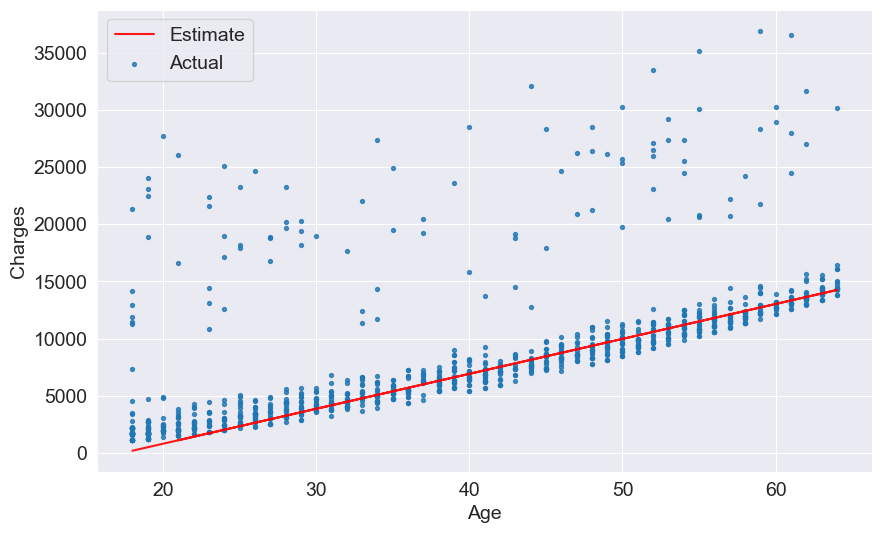

In [87]:
try_parameters(sgd_regressor.coef_, sgd_regressor.intercept_)

In [88]:

inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']


model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)


loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


Linear Regression using Multiple Features


In [89]:

inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [90]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

In [91]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [94]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [95]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488036)

In [96]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542205

In [97]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [98]:

inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


In [102]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [101]:

inputs, targets = df[['age', 'bmi', 'children']], df['charges']


model = LinearRegression().fit(inputs, targets)


predictions = model.predict(inputs)


loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



## Binary Categories



<Axes: xlabel='smoker', ylabel='charges'>

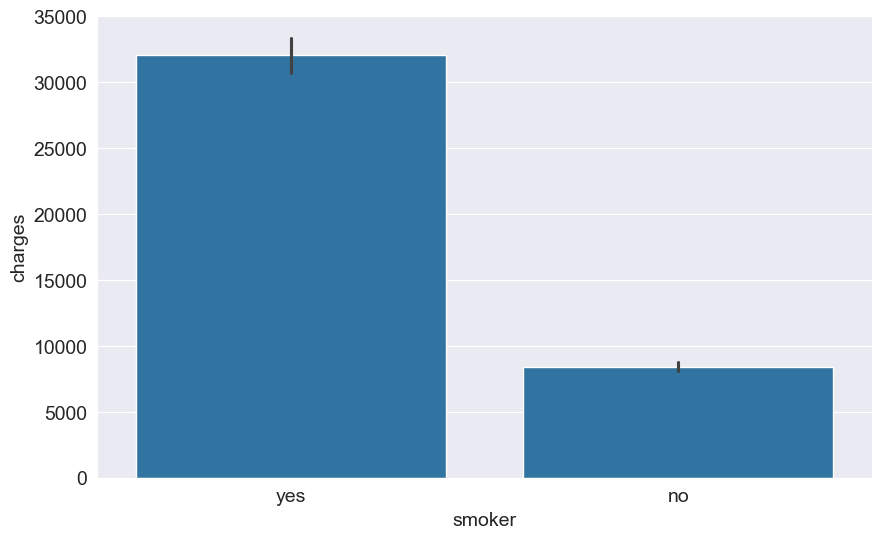

In [104]:
sns.barplot(data=df, x='smoker', y='charges')

In [105]:
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)

In [106]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [107]:
df.charges.corr(df.smoker_code)

0.7872514304984778

In [109]:
inputs, targets = df[['age', 'bmi', 'children', 'smoker_code']], df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

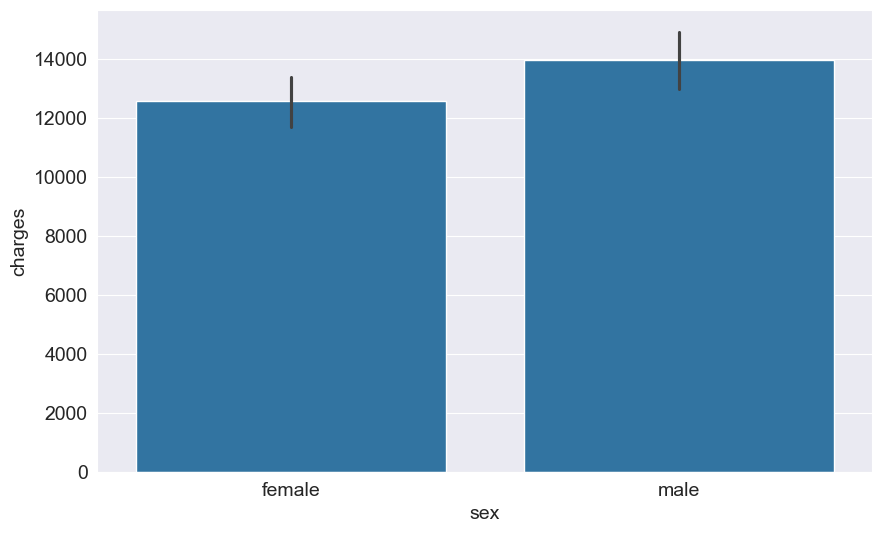

In [110]:
#Let's try adding the "sex" column as well.
sns.barplot(data=df, x='sex', y='charges')

In [111]:
sex_codes = {'female': 0, 'male': 1}
df["sex_code"] = df.sex.map(sex_codes)

In [112]:
df.charges.corr(df.sex_code)

0.05729206220202533

In [114]:

inputs, targets = df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

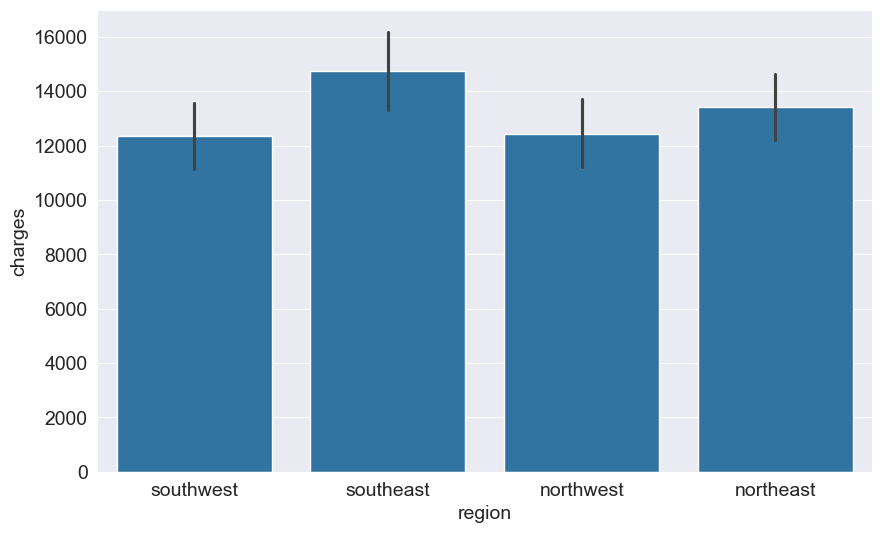

In [116]:
sns.barplot(data=df, x='region', y='charges')

In [117]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [118]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [119]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [120]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [121]:

input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = df[input_cols],df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print('Loss:', loss)

Loss: 6041.6796511744515


In [122]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [123]:
model.intercept_

-12525.547811195458

In [124]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


##While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.
Because different columns have different ranges, we run into two issues:
We can't compare the weights of different column to identify which features are important
A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.
For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

We can apply scaling using the StandardScaler class from scikit-learn.


In [132]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [135]:
scaler.mean_
#The scaler.mean_ output shows the mean values of each column before scaling

array([39.20702541, 30.66339686,  1.09491779])

In [136]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [137]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [139]:
import numpy as np

print("Scaled data mean:\n", np.mean(scaled_inputs, axis=0))
print("\nScaled data std dev:\n", np.std(scaled_inputs, axis=0))
#mean should be close to zero and standard deviation should be close to one(1)

Scaled data mean:
 [-1.80556450e-16 -2.12419353e-16 -5.57600802e-17]

Scaled data std dev:
 [1. 1. 1.]


In [140]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [141]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


In [142]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [145]:
new_customers = [[28,30,2,1,0,0,1,0,0]]
scaler.transform([[28,30,2]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [146]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0]])

array([29875.81463371])

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [151]:
model = LinearRegression().fit(inputs_train, targets_train)

predictions_test = model.predict(inputs_test)

loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6171.858649285376


In [152]:

predictions_train = model.predict(inputs_train)

loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6028.790241319433


In [ ]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#implement a simple neural network regression using TensorFlow and Keras:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate sample data
np.random.seed(0)
X = np.random.rand(1000, 5)
y = 2 + 3*X[:, 0] + 1.5*X[:, 1]**2 - 0.8*X[:, 2]**3 + np.random.normal(0, 0.2, 1000)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test MSE: {test_loss}")

# Make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Generate or load your dataset
# Example dataset: y = 3x + 2
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 3 * X.squeeze() + 2 + np.random.randn(100)  # Adding some noise

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

# Step 5: Fit the model on the training data
sgd_reg.fit(X_train, y_train)

# Step 6: Predict on the testing set
y_pred = sgd_reg.predict(X_test)

# Step 7: (Optional) Plot results or print metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()